# Importing Libraries


In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras.layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Importing Dataset

In [23]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

# Visualizing The Data


In [24]:
x_train.shape

(60000, 28, 28)

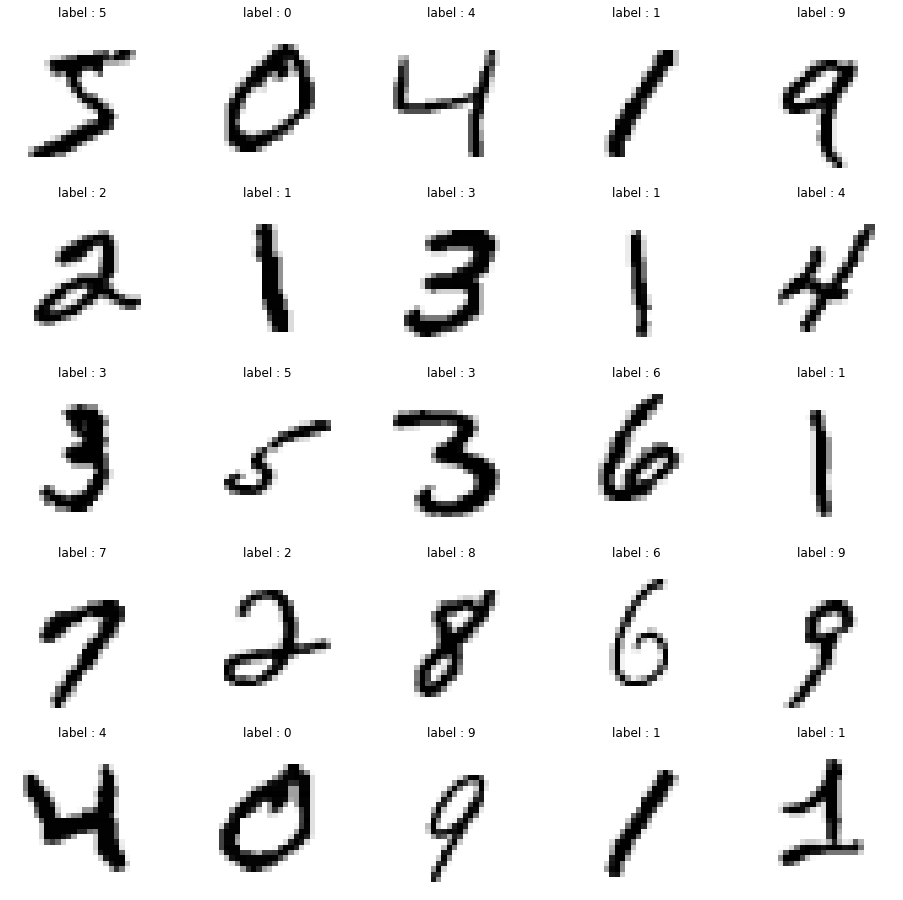

In [25]:
y, x = plt.subplots(5, 5, figsize = (16,16))
for i, x in enumerate(x.flatten()):
    x.axis('off')
    x.set_title(f'label : {y_train[i]}')
    x.imshow(x_train[i], cmap = 'binary')
plt.show()

# Creating Model 

#1st Model

In [26]:
model_1 = Sequential()
model_1.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Flatten())
model_1.add(Dense(128, activation=tf.nn.relu))
model_1.add(Dropout(0.2))
model_1.add(Dense(10,activation=tf.nn.softmax))

#2nd Model

In [27]:
input = tensorflow.keras.layers.Input(shape = (28,28))
x = tensorflow.keras.layers.LSTM(64, activation = "relu")(input)
out = tensorflow.keras.layers.Dense(10, activation = "softmax")(x)

model_2 = tf.keras.models.Model(input, out)
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                23808     
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 24,458
Trainable params: 24,458
Non-trainable params: 0
_________________________________________________________________


# Training Model

#1st Model

In [28]:
model_1.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
fitted_model_1=model_1.fit(x=x_train,y=y_train, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2232 - accuracy: 0.9335
Epoch 2/25
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0885 - accuracy: 0.9726
Epoch 3/25
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0608 - accuracy: 0.9808
Epoch 4/25
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0465 - accuracy: 0.9851
Epoch 5/25
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0381 - accuracy: 0.9873
Epoch 6/25
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0286 - accuracy: 0.9910
Epoch 7/25
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0251 - accuracy: 0.9913
Epoch 8/25
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0230 - accuracy: 0.9927
Epoch 9/25
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0212 - accuracy: 0.9929
Epoch 10/25
1875/1875 [==============================] - 32s 17m

#2nd Model

In [29]:
model_2.compile(optimizer  ="adam", loss = "sparse_categorical_crossentropy", metrics = ["acc"])
fitted_model_2 = model_2.fit(x_train, y_train, epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 24s 12ms/step - loss: 0.4866 - acc: 0.8429
Epoch 2/50
1875/1875 [==============================] - 23s 13ms/step - loss: 0.1339 - acc: 0.9580
Epoch 3/50
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0991 - acc: 0.9691
Epoch 4/50
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0780 - acc: 0.9760
Epoch 5/50
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0649 - acc: 0.9802
Epoch 6/50
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0550 - acc: 0.9830
Epoch 7/50
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0507 - acc: 0.9841
Epoch 8/50
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0447 - acc: 0.9860
Epoch 9/50
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0396 - acc: 0.9870
Epoch 10/50
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0359 - acc: 0.9885
Epoch 11/

# Model Accuracy

#1st Model

In [30]:
loss, accuracy = model_1.evaluate(x_test, y_test)
print("Loss: {0}, Accuracy: {1}".format(loss, accuracy))

313/313 [==============================] - 2s 6ms/step - loss: 0.0823 - accuracy: 0.9848
Loss: 0.08228527754545212, Accuracy: 0.9847999811172485


#2nd Model

In [31]:
loss, accuracy = model_1.evaluate(x_test, y_test)
print("Loss: {0}, Accuracy: {1}".format(loss, accuracy))

313/313 [==============================] - 2s 6ms/step - loss: 0.0823 - accuracy: 0.9848
Loss: 0.08228527754545212, Accuracy: 0.9847999811172485


# Accuracy Plot 

#1st Model

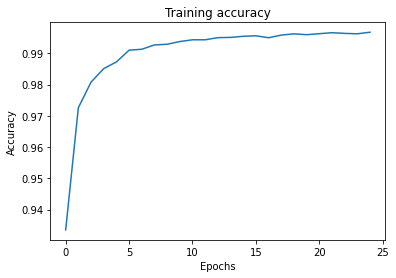

In [32]:
accuracy = fitted_model_1.history['accuracy']
epochs = range(0, 25)

plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, accuracy)
plt.show()

#2nd Model

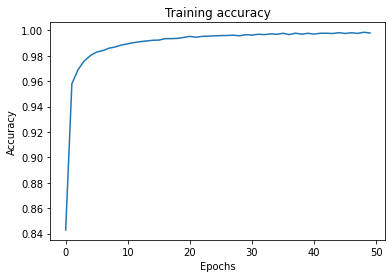

In [33]:
accuracy = fitted_model_2.history['acc']
epochs = range(0, 50)

plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, accuracy)
plt.show()

# Validation

#1st Model

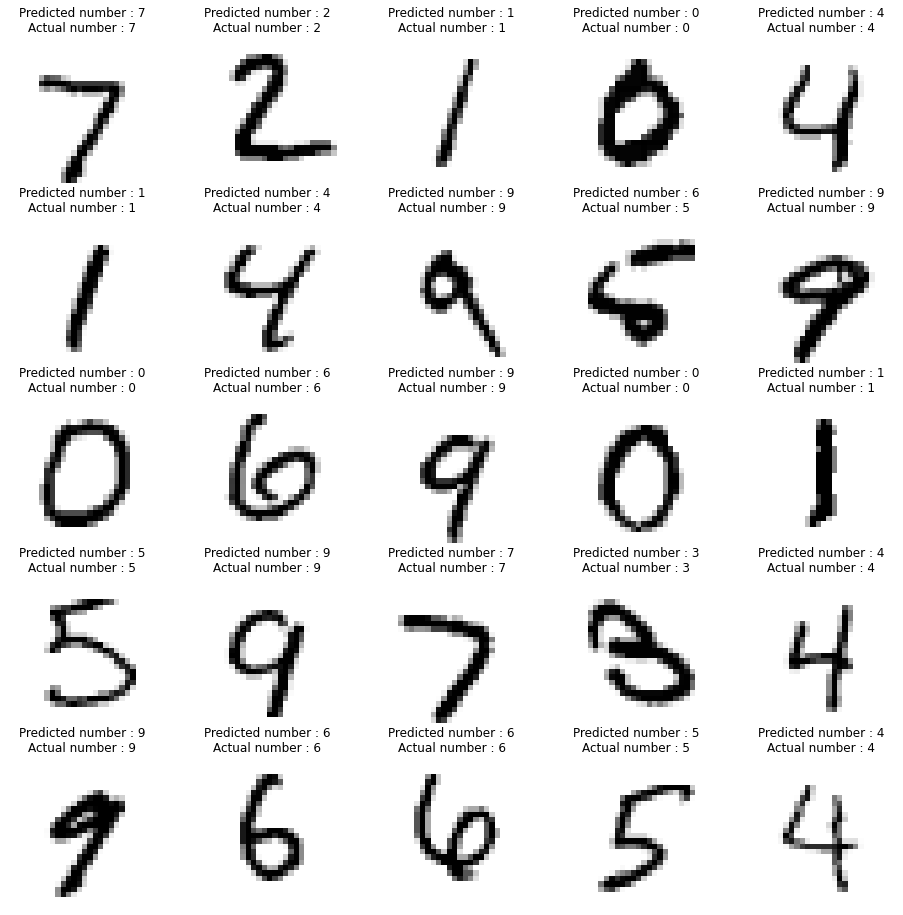

In [34]:
y_pred = model_1.predict(x_test)

fig, ax = plt.subplots(5, 5, figsize = (16,16))
for i, ax in enumerate(ax.flatten()):
    ax.axis('off')
    ax.set_title(f'Predicted number : {y_pred[i].argmax()}\nActual number : {y_test[i]}')
    ax.imshow(x_test[i], cmap ='binary')
plt.show()

#2nd Model

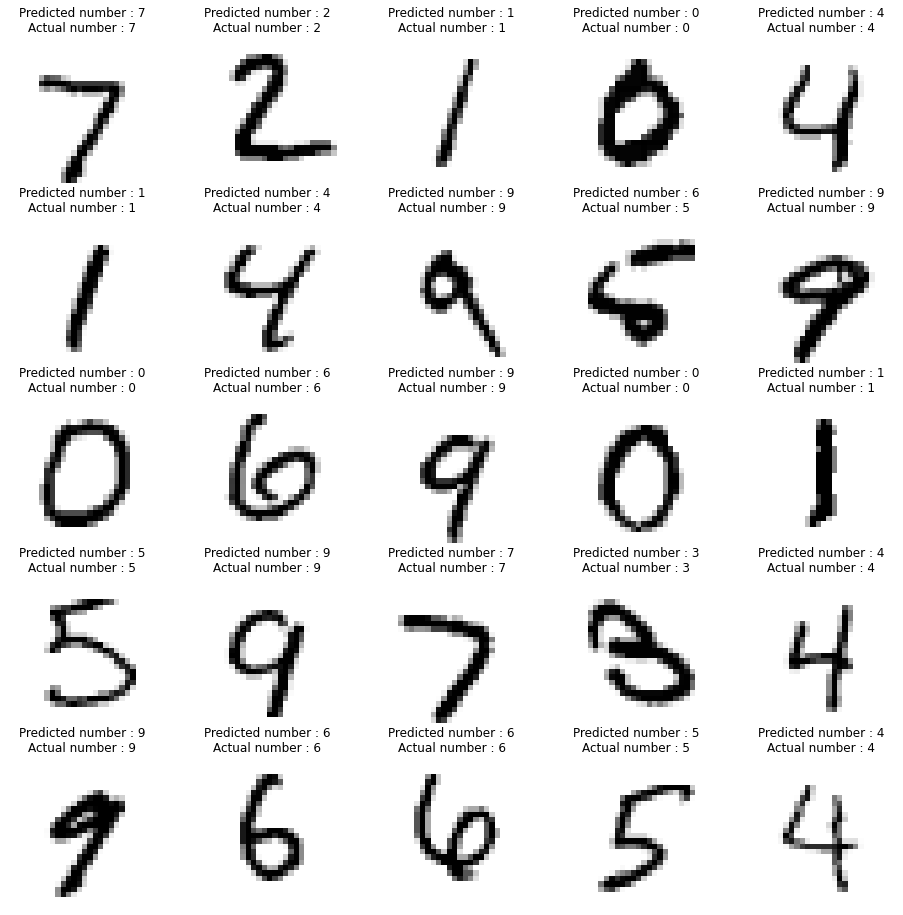

In [35]:
y_pred = model_2.predict(x_test)

fig, ax = plt.subplots(5, 5, figsize = (16,16))
for i, ax in enumerate(ax.flatten()):
    ax.axis('off')
    ax.set_title(f'Predicted number : {y_pred[i].argmax()}\nActual number : {y_test[i]}')
    ax.imshow(x_test[i], cmap ='binary')
plt.show()